In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model

In [2]:
df = pd.read_csv('weight-height.csv', delimiter=',')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df['Height'] = df['Height'] * 2.45
#Converting Height from inches to cm
df['Weight'] = df['Weight'] / 2.205
#Converting Weight from pounds to kilograms
df.head()

,Gender,Height,Weight
0,Male,180.925192,109.702296
1,Male,168.515665,73.610192
2,Male,181.569758,96.481114
3,Male,175.740897,99.792504
4,Male,171.210400,93.582676


# Checking data information

In [4]:
df.shape

(10000, 3)

In [5]:
df.dtypes

Gender     object
Height    float64
Weight    float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [8]:
# The number of unique values of column Gender
df.Gender.nunique()

2

In [10]:
# The unique values of column Gender
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [23]:
#Checking number of samples for male
df[df['Gender'] == 'Male'].shape

(5000, 3)

In [26]:
#Checking number of samples for female
df[df['Gender'] == 'Female'].shape

(5000, 3)

Text(0, 0.5, 'Frequency')

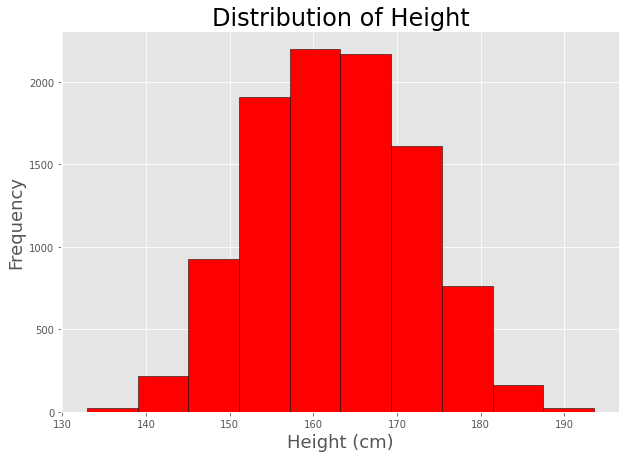

In [15]:
plt.style.use('ggplot')

# histogram of the height
df.Height.plot(kind='hist', color='red', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Height', size=24)
plt.xlabel('Height (cm)', size=18)
plt.ylabel('Frequency', size=18)

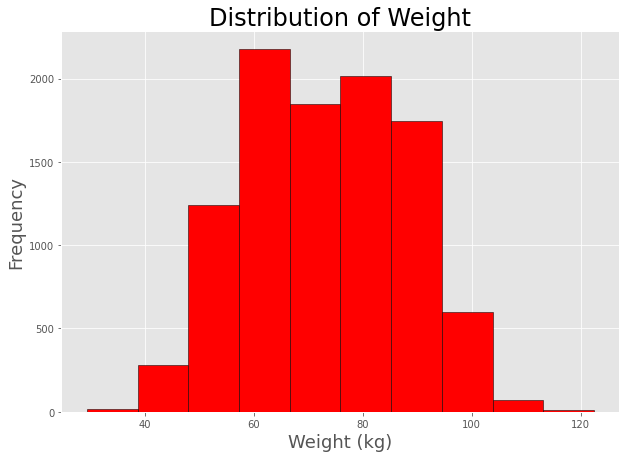

In [16]:
# histogram of the weight
df.Weight.plot(kind='hist', color='red', edgecolor='black', figsize=(10,7))
plt.title('Distribution of Weight', size=24)
plt.xlabel('Weight (kg)', size=18)
plt.ylabel('Frequency', size=18);

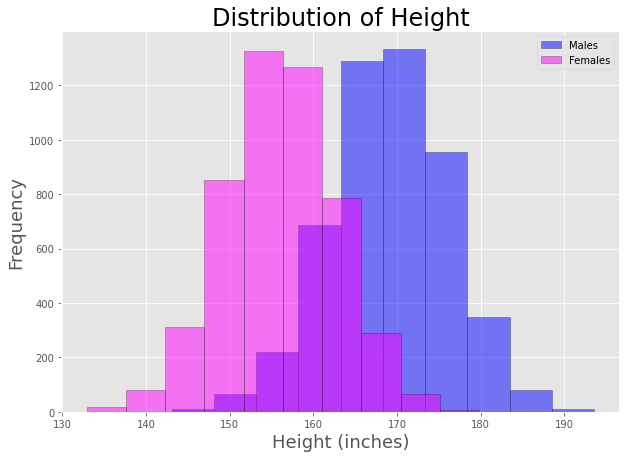

In [17]:
# histogram of the height - males and females

df[df['Gender'] == 'Male'].Height.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].Height.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Males', 'Females'])
plt.title('Distribution of Height', size=24)
plt.xlabel('Height (cm)', size=18)
plt.ylabel('Frequency', size=18);

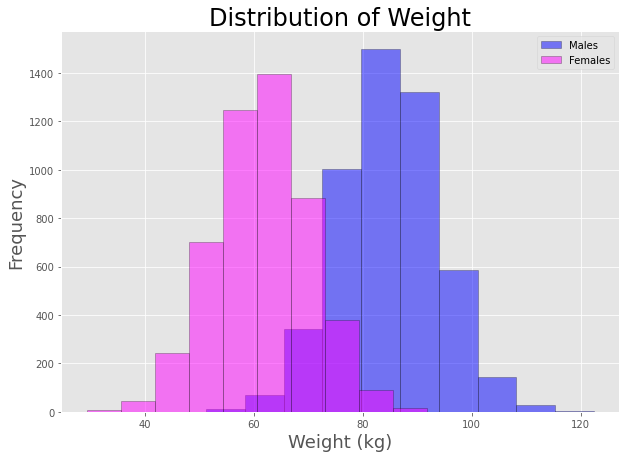

In [18]:
# histogram of the weight - males and females

df[df['Gender'] == 'Male'].Weight.plot(kind='hist', color='blue', edgecolor='black', alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].Weight.plot(kind='hist', color='magenta', edgecolor='black', alpha=0.5, figsize=(10, 7))
plt.legend(labels=['Males', 'Females'])
plt.title('Distribution of Weight', size=24)
plt.xlabel('Weight (kg)', size=18)
plt.ylabel('Frequency', size=18);

In [19]:
# Descriptive statistics male
statistics_male = df[df['Gender'] == 'Male'].describe()
statistics_male.rename(columns=lambda x: x + '_male', inplace=True)

# Descriptive statistics female
statistics_female = df[df['Gender'] == 'Female'].describe()
statistics_female.rename(columns=lambda x: x + '_female', inplace=True)

# Dataframe that contains statistics for both male and female
statistics = pd.concat([statistics_male, statistics_female], axis=1)
statistics

,Height_male,Weight_male,Height_female,Weight_female
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,169.114547,84.816608,156.086495,61.614555
std,7.015237,8.971045,6.605896,8.626970
min,143.096917,51.203147,132.944677,29.342461
25%,164.577964,78.860665,151.641382,55.752425
50%,169.117886,84.822470,156.140763,61.731330
75%,173.922422,90.865216,160.630735,67.487948
max,193.546919,122.444308,179.804485,91.717557


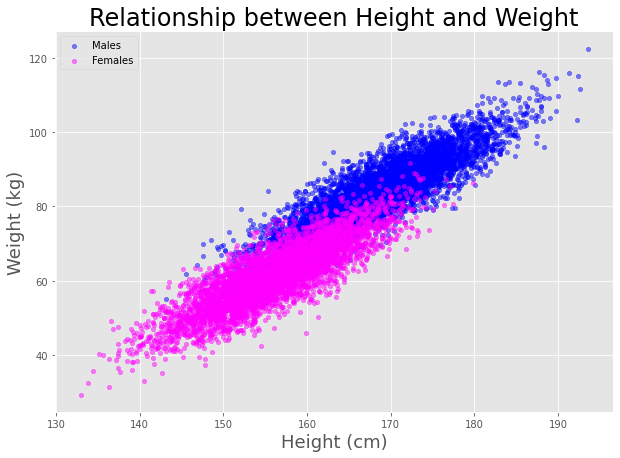

In [47]:
# Scatter plot of Height and Weight

ax1 = df[df['Gender'] == 'Male'].plot(kind='scatter', x='Height', y='Weight', color='blue', alpha=0.5, figsize=(10, 7))
df[df['Gender'] == 'Female'].plot(kind='scatter', x='Height', y='Weight', color='magenta', alpha=0.5, figsize=(10 ,7), ax=ax1)
plt.legend(labels=['Males', 'Females'])
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (cm)', size=18)
plt.ylabel('Weight (kg)', size=18);

# Regression

In [44]:
# best fit polynomials

df_males = df[df['Gender'] == 'Male']
df_females = df[df['Gender'] == 'Female']


In [45]:
regr_male = linear_model.LinearRegression()
regr_male.fit(df_males.Height.values.reshape(-1,1), df_males.Weight.values.reshape(-1,1)) # fitting the model=training the model
print(regr_male.coef_,regr_male.intercept_)

[[1.10357237]] [-101.8135332]


In [110]:
mc= regr_male.coef_[0]
mc

array([1.10357237])

In [112]:
mi=regr_male.intercept_[0]
mi

-101.81353319975449

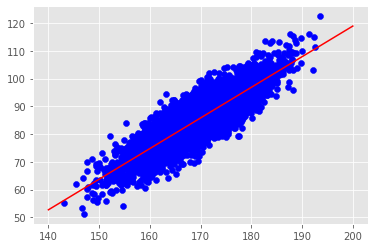

In [119]:
#Plotting regression line for the male
xval = np.linspace(140,200,20).reshape(-1,1)
yval = regr_male.predict(xval)

plt.scatter(df_males.Height,df_males.Weight,color="blue")
plt.plot(xval,yval,color="r" ) # this plots the line


plt.show()

In [122]:
#Regression equation for males
print('y ={:.2f} + {:.2f}*x'.format(regr_male.intercept_[0],float(regr_male.coef_[0]) ))

y =-101.81 + 1.10*x


In [100]:
#Evaluation
from sklearn import metrics
yhat = regr_male.predict(df_males.Height.values.reshape(-1,1))
print('R2 value:', metrics.r2_score(df_males.Weight, yhat))

R2 value: 0.744732493159145


In [46]:
regr_female = linear_model.LinearRegression()
regr_female.fit(df_females.Height.values.reshape(-1,1), df_females.Weight.values.reshape(-1,1)) # fitting the model=training the model
print(regr_female.coef_,regr_female.intercept_)

[[1.10954632]] [-111.57064206]


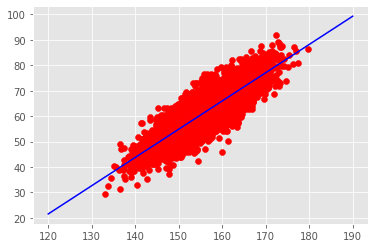

In [54]:
#Plotting regression line for the female
xval = np.linspace(120,190,20).reshape(-1,1)
yval = regr_female.predict(xval)
plt.plot(xval,yval,color="blue" ) # this plots the line
plt.scatter(df_females.Height,df_females.Weight,color="r")
plt.show()

In [121]:
#Regression equation for females
print('y ={:.2f} + {:.2f}*x'.format(regr_female.intercept_[0],float(regr_female.coef_[0]) ))

y =-111.57 + 1.11*x


In [58]:
#Evaluation
from sklearn import metrics
yhat = regr_female.predict(df_females.Height.values.reshape(-1,1))
print('R2 value:', metrics.r2_score(df_females.Weight, yhat))

R2 value: 0.7218347586122993
